In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

import matplotlib.pyplot as plt

import seaborn as sns

import re

# EDA - Exploratory Data Anaysis
- Importing the original dataset
- Checking the number of rows and columns of the dataset
- Checking the total of null values per columns
- Checking the total of unique values per column

In [2]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/novaaaa/last/New folder/aaa/reporting_ncr_all_transactions_202303071208.csv')
pd.set_option('display.max_colwidth', None)
df.head(5)

C:\Users\Olimpio.Dasilva\AppData\Local\Temp\ipykernel_11628\1396767423.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/novaaaa/last/New folder/aaa/reporting_ncr_all_transactions_202303071208.csv')


,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name,row_num,count_per_stratum
0,DI1645,Ac35d595f469636cb8dc741ea8f51daf0,T3fb20a87a163396d9c60d2d04b3266a1,27.68,USD,Withdrawal #**,ABC FINE WINE/SP 750 S ALAFAYA TRL ORLANDO FL,FL,2022-07-25,10032,ABC FINE WINE,Unknow Payment Agent,NaN,2022-07-29,FTS_CSLK_TRANSAC_20220728_100006.csv,Orlando Credit Union,2910,5820
1,DI1698,A9e8b027aac9f385cbcd0df9835e4e0a2,T51afafd12f2333a8a5775b6003c7ab86,66.10,USD,POS Transaction,IC* ABC FINE VIA IN HTTPSWWW.ABCF CAUS,NaN,2022-07-17,10032,ABC FINE WINE,Unknow Payment Agent,NaN,2022-07-20,FTS_CSLK_TRANSAC_20220719_100006.csv,Florida West Coast Credit Union,2909,5820
2,DI1425,Af934c4b182d5388e806394e036b85f09,Tbbfc24cf219e361f898363190c44756b,33.52,USD,Withdrawal Debit ABC FINE,WINE/SP 14086 ORLANDO FLUS,NaN,2022-11-22,10032,ABC FINE WINE,Unknow Payment Agent,NaN,2022-11-25,FTS_CSLK_TRANSAC_20221124_100006.csv,Fairwinds Credit Union,2908,5820
3,DI1645,A1fd60062211730c08c60a2573e7c6450,T786516182d433b869ac3c06a80d009bf,15.97,USD,Withdrawal #**,ABC FINE WINE/SPIRITS 147 2322 S SEMORAN BLVD ORLANDO FL,FL,2022-09-22,10032,ABC FINE WINE,Unknow Payment Agent,NaN,2022-09-25,FTS_CSLK_TRANSAC_20220924_100033.csv,Orlando Credit Union,2907,5820
4,DI1425,A67fd35cb47863497aafeb3d209e8d975,T88ec7422e707337586e0f973a3194ce9,101.00,USD,Withdrawal Debit ABC FINE,WINE/SP 1 ORLANDO FLUS,NaN,2022-07-30,10032,ABC FINE WINE,Unknow Payment Agent,NaN,2022-08-03,FTS_CSLK_TRANSAC_20220802_100006.csv,Fairwinds Credit Union,2906,5820


In [3]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (12942465, 18)


In [4]:
print('Total number of null values per column:')
df.isnull().sum()
#df.dropna(inplace=True)

Total number of null values per column:


fi_id                           0
account_id                      0
transaction_id                  0
amount                          1
currency                        0
txn_desc1                      59
txn_desc2                 1062737
region                   10949019
transaction_timestamp           1
merchant_id                   161
merchant_name                   0
payment_agent                   0
payment_agent_id         12300037
extract_date                    0
filename                        0
name                            0
row_num                         0
count_per_stratum               0
dtype: int64

In [5]:
print('Total number of unique values per column:')
df.nunique()

Total number of unique values per column:


fi_id                         216
account_id                 241421
transaction_id           12585092
amount                     107046
currency                        1
txn_desc1                 1150308
txn_desc2                 5878584
region                         50
transaction_timestamp         683
merchant_id                  2292
merchant_name                2311
payment_agent                  23
payment_agent_id               82
extract_date                  634
filename                      696
name                          216
row_num                   1075746
count_per_stratum            1210
dtype: int64

# Unknown Merchant Names
- Selecting dataset with unknown merchants only
- Checking the number of rows and columns

In [6]:
df_unknown_merchs = df.copy(deep=True)
df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_unknown_merchs.shape)

Total number of rows and columns: (0, 18)


# Known Merchant Names
- Selecting known merchants only 
- Checking the number of rows/transactions
- Checking the total number of merchants
- Checking the total number of occurrences per merchant
- Concatenated the transaction details columns
- Defined a function for word cloud for top merchants
- Defined a function for N-gram for top merchants with combined names
- Defined a function to check occurence of merchants in transaction columns

In [7]:
# Selecting only known merchants names from the original dataset
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False]
#######
df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs_cp2 = df_known_merchs_cp2[df["merchant_name"].str.contains("Unknow Merchant") == False]

In [8]:
print('Number of transactions with known merchant names:\n',len(df_known_merchs) )

Number of transactions with known merchant names:
 12942465


In [9]:
print('Total number of known merchants:\n',len(df_known_merchs.merchant_name.unique()))

Total number of known merchants:
 2311


In [10]:
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM       8.3%
WALMART          6.8%
MCDONALD'S       3.3%
APPLE STORE      3.0%
TARGET           2.3%
                 ... 
CARRABBA         0.0%
BAFFIN           0.0%
HERC RENTAL      0.0%
MODA OPERANDI    0.0%
EGENCIA          0.0%
Name: merchant_name, Length: 2311, dtype: object


In [11]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [12]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

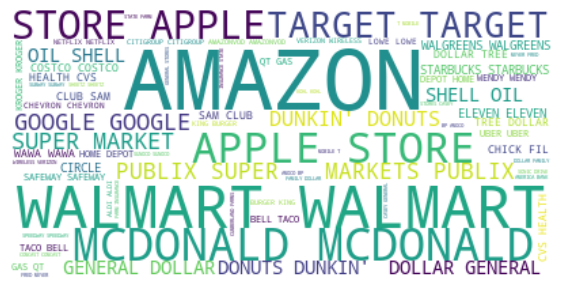

In [13]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] 
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

# Word cloud for more frequent merchant names
word_cloud(df_known_merchs.AFS_MECHANT_NAMES)

In [14]:
df_known_merchs

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES
0,T3fb20a87a163396d9c60d2d04b3266a1,Withdrawal #** %%%%% ABC FINE WINE/SP 750 S ALAFAYA TRL ORLANDO FL,Unknow Payment Agent,ABC FINE WINE
1,T51afafd12f2333a8a5775b6003c7ab86,POS Transaction %%%%% IC* ABC FINE VIA IN HTTPSWWW.ABCF CAUS,Unknow Payment Agent,ABC FINE WINE
2,Tbbfc24cf219e361f898363190c44756b,Withdrawal Debit ABC FINE %%%%% WINE/SP 14086 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE
3,T786516182d433b869ac3c06a80d009bf,Withdrawal #** %%%%% ABC FINE WINE/SPIRITS 147 2322 S SEMORAN BLVD ORLANDO FL,Unknow Payment Agent,ABC FINE WINE
4,T88ec7422e707337586e0f973a3194ce9,Withdrawal Debit ABC FINE %%%%% WINE/SP 1 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE
...,...,...,...,...
12942460,Tde39934961a137e2b979102d9eb0f63b,POS Withdrawal UBISOFT EMEA SAS %%%%% - NYUS,Unknow Payment Agent,UBISOFT
12942461,Tfbc4d1b47f4a363bbaeb62c3ae253d50,Card purchase %%%%% UBISOFT EMEA SAS 7993 (2022-08-23) - NY WPGTID01,Unknow Payment Agent,UBISOFT
12942462,T7949ded3b8633bab815088bd640259b6,POS PURCHASE %%%%% UBISOFT SAN FRANCISCO CA WPGTID,Unknow Payment Agent,UBISOFT
12942463,Tc0a84cd3d7bc3c67b610c678be78f63d,Withdrawal Debit PAYPAL %%%%% *UBISOFT IN 402-935-7733 CAUS,PAYPAL,UBISOFT


In [15]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

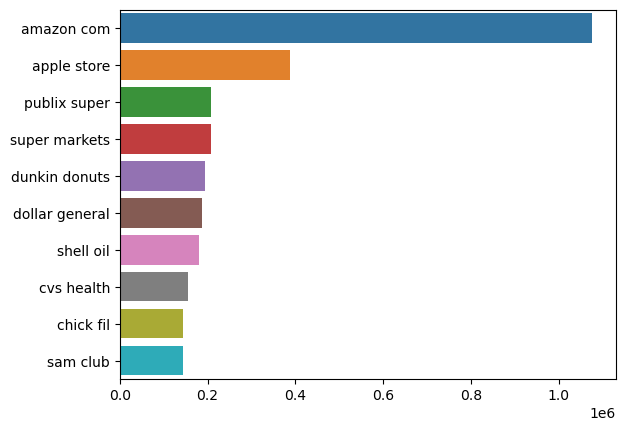

In [16]:
top_n_bigrams=get_top_ngram(df_known_merchs['AFS_MECHANT_NAMES'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x);

In [17]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:4] in t_details_1)):
        return True
    else:
        return False
    

- Checked the occurrence of merchants in the first and secod transation colums separately
- Checked the total number of occurrences per column

In [18]:
# Merchants in the txt_1 or txt_2 columns
df_known_merchs_cp2['txn_desc2'] = df_known_merchs_cp2['txn_desc2'].astype(str)
df_known_merchs_cp2['txn_desc1'] = df_known_merchs_cp2['txn_desc1'].astype(str)
df_known_merchs_cp2['merchant_name'] = df_known_merchs_cp2['merchant_name'].astype(str)
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc1), axis=1) # OR txn_desc2
df_known_merchs_cp2.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,CHECK_MERCH_TRA_cp
0,T3fb20a87a163396d9c60d2d04b3266a1,Withdrawal #**,ABC FINE WINE/SP 750 S ALAFAYA TRL ORLANDO FL,Unknow Payment Agent,ABC FINE WINE,False
1,T51afafd12f2333a8a5775b6003c7ab86,POS Transaction,IC* ABC FINE VIA IN HTTPSWWW.ABCF CAUS,Unknow Payment Agent,ABC FINE WINE,False
2,Tbbfc24cf219e361f898363190c44756b,Withdrawal Debit ABC FINE,WINE/SP 14086 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE,True
3,T786516182d433b869ac3c06a80d009bf,Withdrawal #**,ABC FINE WINE/SPIRITS 147 2322 S SEMORAN BLVD ORLANDO FL,Unknow Payment Agent,ABC FINE WINE,False
4,T88ec7422e707337586e0f973a3194ce9,Withdrawal Debit ABC FINE,WINE/SP 1 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE,True


In [19]:
print('Total of transactions with known merchants:\n',len(df_known_merchs_cp2))

Total of transactions with known merchants:
 12942465


In [20]:
print('Merchant name occurrence in txn_desc1 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc1 column:
 5521101


In [21]:
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc2), axis=1)
print('Merchant name occurrence in txn_desc2 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc2 column:
 9072920


- Checked occurrence of merchants in concatenated transaction column
- Created CHECK_MERCH_TRA to inspect occurrences
- Checked total number of occurences in merchant details coolumn

In [22]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,T3fb20a87a163396d9c60d2d04b3266a1,Withdrawal #** %%%%% ABC FINE WINE/SP 750 S ALAFAYA TRL ORLANDO FL,Unknow Payment Agent,ABC FINE WINE,True
1,T51afafd12f2333a8a5775b6003c7ab86,POS Transaction %%%%% IC* ABC FINE VIA IN HTTPSWWW.ABCF CAUS,Unknow Payment Agent,ABC FINE WINE,True
2,Tbbfc24cf219e361f898363190c44756b,Withdrawal Debit ABC FINE %%%%% WINE/SP 14086 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE,True
3,T786516182d433b869ac3c06a80d009bf,Withdrawal #** %%%%% ABC FINE WINE/SPIRITS 147 2322 S SEMORAN BLVD ORLANDO FL,Unknow Payment Agent,ABC FINE WINE,True
4,T88ec7422e707337586e0f973a3194ce9,Withdrawal Debit ABC FINE %%%%% WINE/SP 1 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE,True


In [23]:
# Merchant name in the transaction description
print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

Merchant name in the transaction description:
 12764116


- Created a copy to encode CHECK_MERCH_TRA results
- Created a chart to compare the results
- Created a word cloud of AFS_MECHANT_NAMES to get most frequen merchants
- Checked how many times merchants are mentioned in transaction details
- Checked how many times merchants are not in transaction details
- Created word cloud for merchants not in transaction details 

In [24]:
df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_PAYMENT_AGENTS','AFS_MECHANT_NAMES','CHECK_MERCH_TRA']].copy(deep=True)
df_known_merchs_cp['CHECK_MERCH_TRA']= df_known_merchs_cp['CHECK_MERCH_TRA'].replace(False,0)
df_known_merchs_cp['CHECK_MERCH_TRA'] = df_known_merchs_cp['CHECK_MERCH_TRA'].replace(True,1)
df_known_merchs_cp.head()



,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
0,T3fb20a87a163396d9c60d2d04b3266a1,Withdrawal #** %%%%% ABC FINE WINE/SP 750 S ALAFAYA TRL ORLANDO FL,Unknow Payment Agent,ABC FINE WINE,1
1,T51afafd12f2333a8a5775b6003c7ab86,POS Transaction %%%%% IC* ABC FINE VIA IN HTTPSWWW.ABCF CAUS,Unknow Payment Agent,ABC FINE WINE,1
2,Tbbfc24cf219e361f898363190c44756b,Withdrawal Debit ABC FINE %%%%% WINE/SP 14086 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE,1
3,T786516182d433b869ac3c06a80d009bf,Withdrawal #** %%%%% ABC FINE WINE/SPIRITS 147 2322 S SEMORAN BLVD ORLANDO FL,Unknow Payment Agent,ABC FINE WINE,1
4,T88ec7422e707337586e0f973a3194ce9,Withdrawal Debit ABC FINE %%%%% WINE/SP 1 ORLANDO FLUS,Unknow Payment Agent,ABC FINE WINE,1


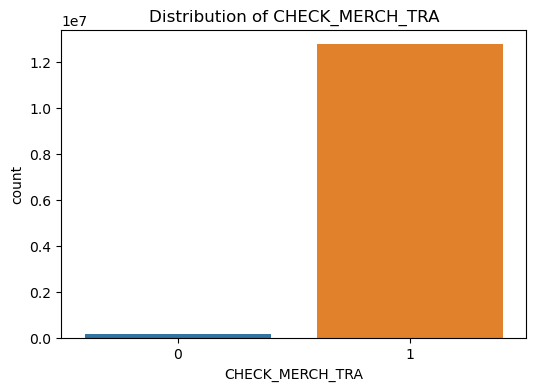

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x="CHECK_MERCH_TRA", data=df_known_merchs_cp)
plt.title("Distribution of CHECK_MERCH_TRA");

In [26]:
print('Percentage of merchant names in T details or not (1/0):\n',(df_known_merchs_cp.CHECK_MERCH_TRA).value_counts(normalize=True).mul(100).round(1).astype(str) + '%');

Percentage of merchant names in T details or not (1/0):
 1    98.6%
0     1.4%
Name: CHECK_MERCH_TRA, dtype: object


In [27]:
# Number of merchant names in transaction details
df_check_true = pd.DataFrame()
df_check_true = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == True]
print('Number of merchant names in transaction details:\n',len(df_check_true))

Number of merchant names in transaction details:
 12764116


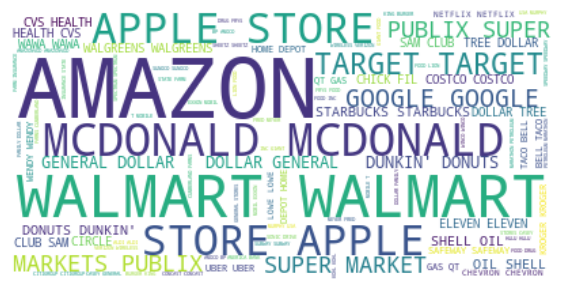

In [28]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description

word_cloud(df_check_true.AFS_MECHANT_NAMES)

In [29]:
print('Total number of occurences per merchant name:\n',(df_check_true.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM           8.3%
WALMART              6.9%
MCDONALD'S           3.4%
APPLE STORE          3.0%
TARGET               2.4%
                     ... 
NATIONWIDE VISION    0.0%
BEAUTY BRANDS        0.0%
FOREVER LIVING       0.0%
YORK DAILY RECORD    0.0%
BAFFIN               0.0%
Name: AFS_MECHANT_NAMES, Length: 2299, dtype: object


In [30]:
print('Number of merchant names NOT in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == False).sum())

Number of merchant names NOT in the transaction description:
 178349


In [31]:
# Number of merchant names not in transaction details
df_check_false = pd.DataFrame()
df_check_false = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == False]
#print('Number of merchant names NOT in the transaction description:\n', len(df_check_false))

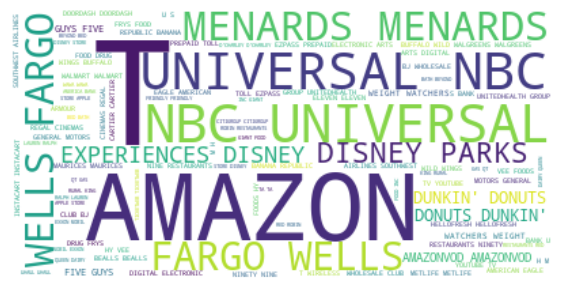

In [32]:
# Word cloud for more frequent merchant names WHEN merchant name is NOT in transaction description
word_cloud(df_check_false.AFS_MECHANT_NAMES)

In [33]:
print('Total number of occurences per merchant name WHEN merchant name is NOT in transation details:\n', (df_check_false.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name WHEN merchant name is NOT in transation details:
 AT&T               36.9%
AMAZON.COM         10.2%
NBC UNIVERSAL       7.0%
MENARDS             5.6%
WELLS FARGO         5.4%
                   ...  
1-800 CONTACTS      0.0%
PANDA EXPRESS       0.0%
ANN TAYLOR LOFT     0.0%
DOUBLETREE          0.0%
POTBELLY            0.0%
Name: AFS_MECHANT_NAMES, Length: 375, dtype: object


- Merchant names not mentioned in transaction description

In [34]:
# Merchant names not mentioned in transaction description
df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA']==False] 


,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
2991,T805d8388cd11323f9d06b0d4d07f9f5c,Point Of Sale Withdrawal Kindle %%%%% Unltd*O35D396P3 866-321-8851 WAUS,Unknow Payment Agent,AMAZON.COM,False
3081,T37c99d35447c330fb59de27c89dcc239,Purchase Kindle Svcs*HK82M5JO3 %%%%% 888-802-3080 WAUS,Unknow Payment Agent,AMAZON.COM,False
3168,T15cec2fd8aa633a8b127523e2e7048e6,Withdrawal Debit Kindle %%%%% Unltd*HI9UW59P2 888-802-3080 WAUS,Unknow Payment Agent,AMAZON.COM,False
3175,T6e4846567c8d3a7688b5fbd063b05eb4,Point Of Sale Withdrawal Kindle %%%%% Unltd*H68UH1888-802-3080 WAUS,Unknow Payment Agent,AMAZON.COM,False
3201,T895edcb280353992978bbf89b7cfb136,DEBIT CARD DEBIT %%%%% auth #* 08-31-2022 KINDLE UNLTD*SM9 888-802-3080 WA *,Unknow Payment Agent,AMAZON.COM,False
...,...,...,...,...,...
12865131,T809c5498b3693e278f16ce0f7ca95cea,CKCD DEBIT 3398 03/16 06:07 PAYPAL *VA NS I 402-935-7733 CA %%%%% nan,PAYPAL,VANS,False
12904171,Tba6db3a55a013ea287b4ff503d25950f,DEBIT CARD DEBIT %%%%% auth #* 05-16-2022 DD DOORDASH ALB *1040 CA *50458,DOORDASH,ALBERTSONS,False
12916725,T60d69c521e373543ae09cd5a1e88c25f,CKCD DEBIT 8483 02/09 14:08 PAYPAL *JC PENN 402-935-7733 TX %%%%% nan,PAYPAL,JCPENNEY,False
12931054,Tf6479916b05c303d9cf029b9e4f4282e,CKCD DEBIT 6070 06/09 14:46 PAYPAL *JC PENN 402-935-7733 TX %%%%% nan,PAYPAL,JCPENNEY,False


# Payment Agents VS Merchant Names
- Selected known payment agents
- Checked number of total occurences per agents
- Checked total number of payment agents
- Checked number of transactions with known payment agents
- Defined a function compare payment agents with merchant names
- Created CHECK_MERCH_AGTS to check when agents and merchants are same
- Checked Totals for different situations

In [35]:
df_known_payment_agents = df_known_merchs.copy(deep=True)
# Known payment agent names
df_known_payment_agents = df_known_payment_agents.loc[df_known_payment_agents['AFS_PAYMENT_AGENTS'] != 'Unknow Payment Agent']
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
5,T03f9b9e6e76033d98628ba9dc8642be3,Withdrawal EMV DEBIT CARD %%%%% DOORDASH*ABC FINE WINE WWW.DOORDASH. CA Date 08/06/22 ***13098 5812,DOORDASH,ABC FINE WINE,True
43,T0edbc7a91607352680fe0aefc915ddf6,Withdrawal Debit DOORDASH*ABC %%%%% FINE WINE WWW.DOORDASH.CAUS,DOORDASH,ABC FINE WINE,True
50,Tbbc5b5a4f21436beab3fce56f0f12309,Withdrawal EMV DEBIT CARD %%%%% DOORDASH*ABC FINE WINE WWW.DOORDASH. CA Date 06/25/22 ***40663 5812,DOORDASH,ABC FINE WINE,True
54,Tc26c651464a930ecbf873f9678a6550c,Withdrawal Visa Check Card %%%%% ABC FINE VIA INSTACART HTTPSWWW.ABCF CA Date 03/12/22 ***24370 5499 %% MCC 5499,INSTACART,ABC FINE WINE,True
55,T05a861659b423e8f8095da37f4500d2d,Withdrawal ABC FINE VIA %%%%% INSTACART HTTPSWWW.ABCF CA Date 01/19/22 ** 5499 %% Card 25 #8051 %% MCC 5499,INSTACART,ABC FINE WINE,True
...,...,...,...,...,...
12942447,Tbc57da630b3b3ea6811ae552dc0fb0d5,Withdrawal PAYPAL *UBISOFT INC %%%%% SAN JOSE CA %% Card 25 #1508 #**,PAYPAL,UBISOFT,True
12942449,Tffd5c9f8f4c031f79db176196f0196ab,PAYPAL INST XFER UBISOFT INC %%%%% nan,PAYPAL,UBISOFT,True
12942456,T1f2fd64be74b3305a2d3589ae59f6671,WITHDRAWAL %%%%% POS 1026 0445 * PAYPAL *UBISOFT San Jose CA,PAYPAL,UBISOFT,True
12942457,T75cf2e4314ef32a7abeb90d56016e53f,POS Withdrawal PAYPAL *UBISOFT %%%%% INC415-547-4000 CAUS,PAYPAL,UBISOFT,True


In [36]:
print('Number of total occurences per payment agents:\n', (df_known_payment_agents.AFS_PAYMENT_AGENTS).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Number of total occurences per payment agents:
 GOOGLE             36.2%
PAYPAL             23.2%
DOORDASH           14.1%
APPLE CASH          6.5%
ROKU                5.1%
SQUARE              5.1%
GRUBHUB.COM         3.3%
OLO                 2.7%
INSTACART           1.7%
SQUARE CASH APP     0.7%
VENMO               0.7%
LEVELUP             0.4%
PRICELINE           0.2%
SEAMLESS.COM        0.1%
FACEBOOK            0.0%
11490               0.0%
UBER                0.0%
14055               0.0%
10891               0.0%
LEVEL UP            0.0%
STEWARTS SHOP       0.0%
WELLS FARGO         0.0%
Name: AFS_PAYMENT_AGENTS, dtype: object


In [37]:
print('Total number of payment agents:\n',len(df_known_payment_agents.AFS_PAYMENT_AGENTS.unique()))

Total number of payment agents:
 22


In [38]:
print('Number of transactions with known payment agents:\n',len(df_known_payment_agents))

Number of transactions with known payment agents:
 418159


In [39]:
# Function to compare payment agent names with merchant names
def compare_occurences(agent, merchant):
    agent = agent.split()
    merchant = merchant.split()
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [40]:
# Checking if merchant names and payment agents are same
df_known_payment_agents['CHECK_MERCH_AGTS'] = df_known_payment_agents.apply(lambda x: compare_occurences(x.AFS_MECHANT_NAMES, x.AFS_PAYMENT_AGENTS), axis=1)
df_known_payment_agents.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
5,T03f9b9e6e76033d98628ba9dc8642be3,Withdrawal EMV DEBIT CARD %%%%% DOORDASH*ABC FINE WINE WWW.DOORDASH. CA Date 08/06/22 ***13098 5812,DOORDASH,ABC FINE WINE,True,False
43,T0edbc7a91607352680fe0aefc915ddf6,Withdrawal Debit DOORDASH*ABC %%%%% FINE WINE WWW.DOORDASH.CAUS,DOORDASH,ABC FINE WINE,True,False
50,Tbbc5b5a4f21436beab3fce56f0f12309,Withdrawal EMV DEBIT CARD %%%%% DOORDASH*ABC FINE WINE WWW.DOORDASH. CA Date 06/25/22 ***40663 5812,DOORDASH,ABC FINE WINE,True,False
54,Tc26c651464a930ecbf873f9678a6550c,Withdrawal Visa Check Card %%%%% ABC FINE VIA INSTACART HTTPSWWW.ABCF CA Date 03/12/22 ***24370 5499 %% MCC 5499,INSTACART,ABC FINE WINE,True,False
55,T05a861659b423e8f8095da37f4500d2d,Withdrawal ABC FINE VIA %%%%% INSTACART HTTPSWWW.ABCF CA Date 01/19/22 ** 5499 %% Card 25 #8051 %% MCC 5499,INSTACART,ABC FINE WINE,True,False


- Checked how many times merchant names and payment agents are same
- Checked how many time merchant names and payment agents are different
- Checked total number of transactions with known agents

In [41]:
print('Same merchant names and payment agents:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==True]))

Same merchant names and payment agents:
 192505


In [42]:
print('Merchant names and payment agents are diferent:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==False]))

Merchant names and payment agents are diferent:
 225654


In [43]:
print('Number of rows with known Agents:\n',len(df_known_payment_agents))

Number of rows with known Agents:
 418159


In [44]:
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
5,T03f9b9e6e76033d98628ba9dc8642be3,Withdrawal EMV DEBIT CARD %%%%% DOORDASH*ABC FINE WINE WWW.DOORDASH. CA Date 08/06/22 ***13098 5812,DOORDASH,ABC FINE WINE,True,False
43,T0edbc7a91607352680fe0aefc915ddf6,Withdrawal Debit DOORDASH*ABC %%%%% FINE WINE WWW.DOORDASH.CAUS,DOORDASH,ABC FINE WINE,True,False
50,Tbbc5b5a4f21436beab3fce56f0f12309,Withdrawal EMV DEBIT CARD %%%%% DOORDASH*ABC FINE WINE WWW.DOORDASH. CA Date 06/25/22 ***40663 5812,DOORDASH,ABC FINE WINE,True,False
54,Tc26c651464a930ecbf873f9678a6550c,Withdrawal Visa Check Card %%%%% ABC FINE VIA INSTACART HTTPSWWW.ABCF CA Date 03/12/22 ***24370 5499 %% MCC 5499,INSTACART,ABC FINE WINE,True,False
55,T05a861659b423e8f8095da37f4500d2d,Withdrawal ABC FINE VIA %%%%% INSTACART HTTPSWWW.ABCF CA Date 01/19/22 ** 5499 %% Card 25 #8051 %% MCC 5499,INSTACART,ABC FINE WINE,True,False
...,...,...,...,...,...,...
12942447,Tbc57da630b3b3ea6811ae552dc0fb0d5,Withdrawal PAYPAL *UBISOFT INC %%%%% SAN JOSE CA %% Card 25 #1508 #**,PAYPAL,UBISOFT,True,False
12942449,Tffd5c9f8f4c031f79db176196f0196ab,PAYPAL INST XFER UBISOFT INC %%%%% nan,PAYPAL,UBISOFT,True,False
12942456,T1f2fd64be74b3305a2d3589ae59f6671,WITHDRAWAL %%%%% POS 1026 0445 * PAYPAL *UBISOFT San Jose CA,PAYPAL,UBISOFT,True,False
12942457,T75cf2e4314ef32a7abeb90d56016e53f,POS Withdrawal PAYPAL *UBISOFT %%%%% INC415-547-4000 CAUS,PAYPAL,UBISOFT,True,False
